In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from metpy.units import pandas_dataframe_to_unit_arrays, units
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir

In [2]:
dt = datetime(2018, 11, 8, 12)
station = '83649'
data = WyomingUpperAir.request_data(dt, station)
df = pandas_dataframe_to_unit_arrays(data)
print(df.keys())

dict_keys(['pressure', 'height', 'temperature', 'dewpoint', 'direction', 'speed', 'u_wind', 'v_wind', 'station', 'station_number', 'time', 'latitude', 'longitude', 'elevation'])


In [3]:
p = df['pressure']
T = df['temperature']
Td = df['dewpoint']
u = df['u_wind']
v = df['v_wind']

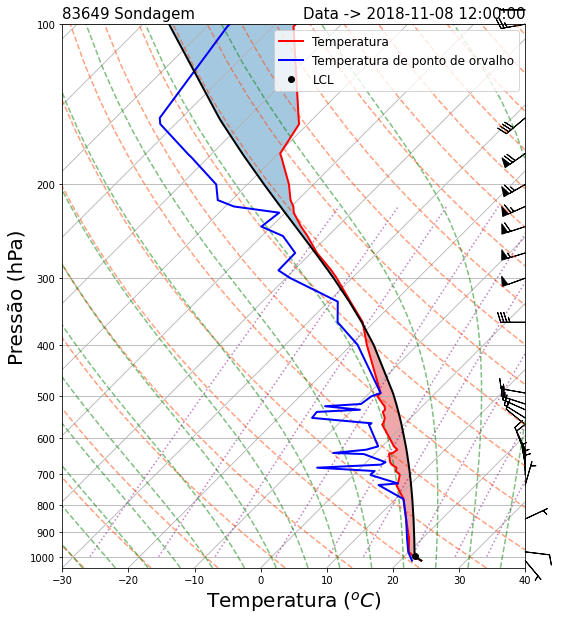

In [4]:
pth = '/home/georygnio/Documentos/meteorologia_aplicada/skew_plot/'

fig = plt.figure(figsize=(9,10))
skew = SkewT(fig, rotation=45)
skew.plot(p, T, 'r', lw=2, label='Temperatura')
skew.plot(p, Td, 'b', lw=2, label='Temperatura de ponto de orvalho')
skew.plot_barbs(p[::2], u[::2], v[::2], y_clip_radius=0.03)
skew.ax.set_xlim(-30, 40)
skew.ax.set_ylim(1050, 100)
skew.plot_dry_adiabats(t0=np.arange(233, 533, 10)*units.K, alpha=0.5, color='orangered')
skew.plot_moist_adiabats(t0=np.arange(233, 400, 5)*units.K, alpha=0.5, color='green')
skew.plot_mixing_lines(p=np.arange(1000, 200, -20)*units.hPa, alpha=0.5, color='purple', linestyle='dotted')
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black', label='LCL')
# Calculate full parcel profile and add to plot as black line
prof = mpcalc.parcel_profile(p, T[0], Td[0]).to('degC')
skew.plot(p, prof, 'k', linewidth=2)

# Shade areas of CAPE and CIN
skew.shade_cin(p, T, prof)
skew.shade_cape(p, T, prof)

plt.title('{} Sondagem'.format(station), fontsize=15, loc='left')
plt.title('Data -> {}'.format(dt), fontsize=15, loc='right')
plt.xlabel('Temperatura ($^oC$)', fontsize=20)
plt.ylabel('Pressão (hPa)', fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.savefig(pth+str(dt),facecolor='w')